In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

X_train_lim = X_train.iloc[:, :14]
X_test_lim = X_test.iloc[:, :14]

print(X_train)

     Loudness    MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6  \
0   -0.295839  0.705806  0.622680  0.589218  0.583665  0.615734  0.670051   
1   -0.354601  0.730755  0.717473  0.559246  0.498000  0.521008  0.573621   
2   -0.390410  0.720149  0.732974  0.654231  0.579008  0.591696  0.659588   
3   -0.336651  0.702284  0.612233  0.576115  0.585301  0.604658  0.623268   
4   -0.399687  0.754564  0.694829  0.606755  0.587290  0.612224  0.627386   
..        ...       ...       ...       ...       ...       ...       ...   
275 -0.201384  0.655562  0.556035  0.554004  0.593931  0.621882  0.664766   
276 -0.424085  0.754108  0.655992  0.594669  0.598380  0.591814  0.613899   
277 -0.409932  0.749103  0.637118  0.563945  0.572124  0.595236  0.615555   
278 -0.447207  0.738296  0.661427  0.638140  0.663786  0.670202  0.681974   
279 -0.396839  0.734516  0.596009  0.503168  0.497005  0.554575  0.601003   

       MFCC_7    MFCC_8    MFCC_9  ...  Mel_Spectrogram_3  Mel_Spectrogram_

In [63]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [65]:
# Naives Bayes
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [66]:
# Test each model/classifier
y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

       angry       0.67      0.93      0.78        30
        fear       0.67      0.47      0.55        30
       happy       0.74      0.77      0.75        30
         sad       0.96      0.83      0.89        30

    accuracy                           0.75       120
   macro avg       0.76      0.75      0.74       120
weighted avg       0.76      0.75      0.74       120

              precision    recall  f1-score   support

       angry       0.75      0.90      0.82        30
        fear       0.88      0.70      0.78        30
       happy       0.90      0.87      0.88        30
         sad       0.94      0.97      0.95        30

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

              precision    recall  f1-score   support

       angry       0.80      0.80      0.80        30
        fear       0.

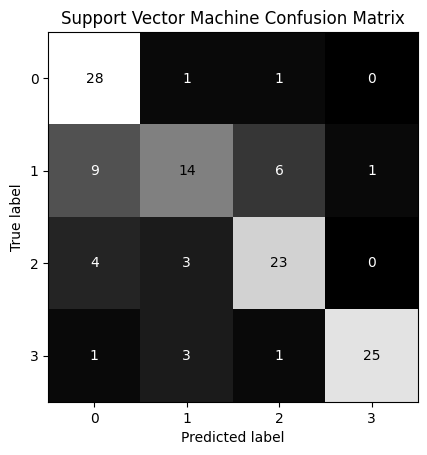

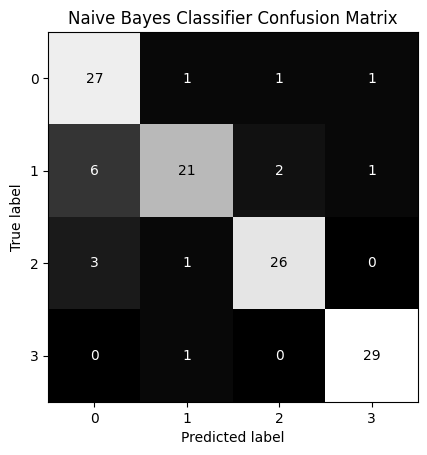

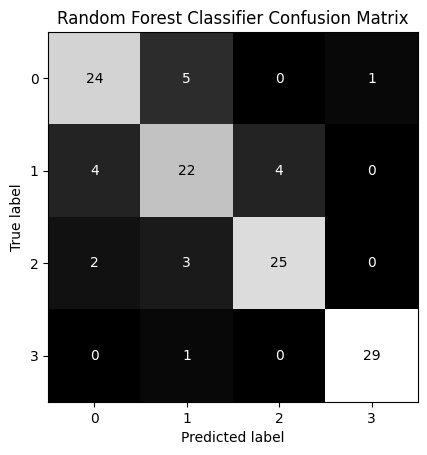

<Figure size 3000x1500 with 0 Axes>

In [67]:
# Model/classifier evaluation report with ROC and Confusion matricies

print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

# Creating vectors of model names, label prediction data, and prediction probability
models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

# Iterating though each model to generate confusion matrices
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

plt.show()